<a href="https://colab.research.google.com/github/daramartyara/3333210056_DaraMartyara/blob/main/Forecasting_%26_Clustering_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/ksrao74/farm-weather-data

In [ ]:
# https://drive.google.com/file/d/1brYjOeQfiHGGBckOoqTVga3Dhq5_SavY/view?usp=sharing

!gdown 1brYjOeQfiHGGBckOoqTVga3Dhq5_SavY

Downloading...
From: https://drive.google.com/uc?id=1brYjOeQfiHGGBckOoqTVga3Dhq5_SavY
To: /content/Tomato.csv
100% 90.5k/90.5k [00:00<00:00, 127MB/s]


In [ ]:
train_data = pd.read_csv('Tomato.csv')
train_data.head()

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato


Check missing values

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2741 non-null   object 
 1   Unit     2741 non-null   object 
 2   Minimum  2741 non-null   int64  
 3   Maximum  2741 non-null   int64  
 4   Average  2741 non-null   float64
 5   Market   2741 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 128.6+ KB


Check statistic vales for every features

In [ ]:
train_data.describe()

,Minimum,Maximum,Average
count,2741.000000,2741.000000,2741.000000
mean,35.089748,41.281284,38.185516
std,16.648425,17.364135,16.970949
min,8.000000,12.000000,10.000000
25%,22.000000,30.000000,25.000000
50%,30.000000,38.000000,35.000000
75%,45.000000,50.000000,47.500000
max,115.000000,120.000000,117.500000


Handle datetime data for time series

In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Unit,Minimum,Maximum,Average,Market
Date,,,,,
2013-06-16,Kg,26,32,29.0,Tomato
2013-06-17,Kg,20,25,22.5,Tomato
2013-06-18,Kg,22,26,24.0,Tomato
2013-06-19,Kg,24,28,26.0,Tomato
2013-06-20,Kg,22,26,24.0,Tomato


**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

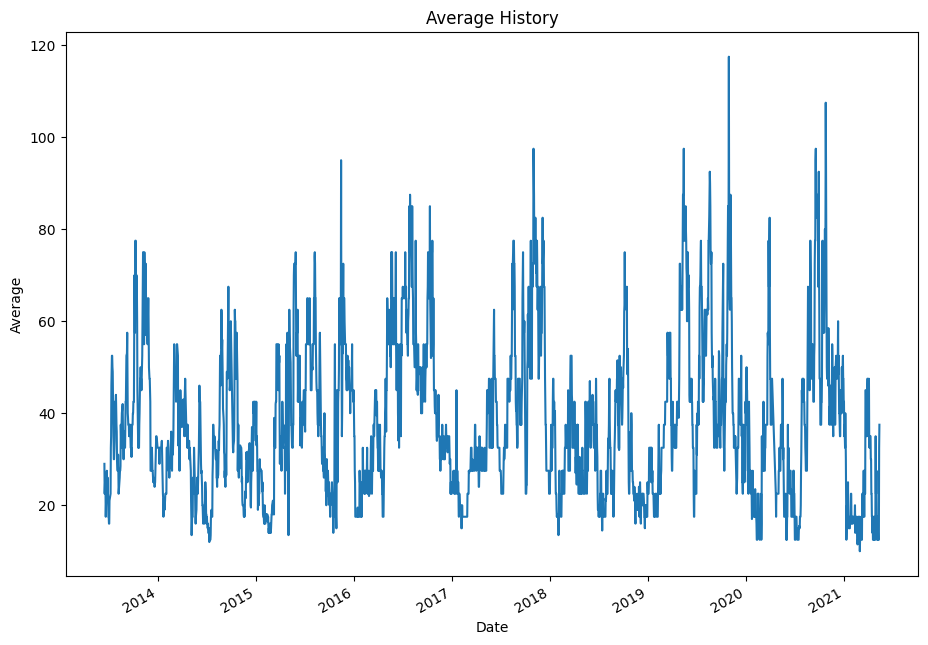

In [ ]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Average'].plot()
plt.title('Average History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Average') # y label
plt.show()

<Figure size 1600x800 with 0 Axes>

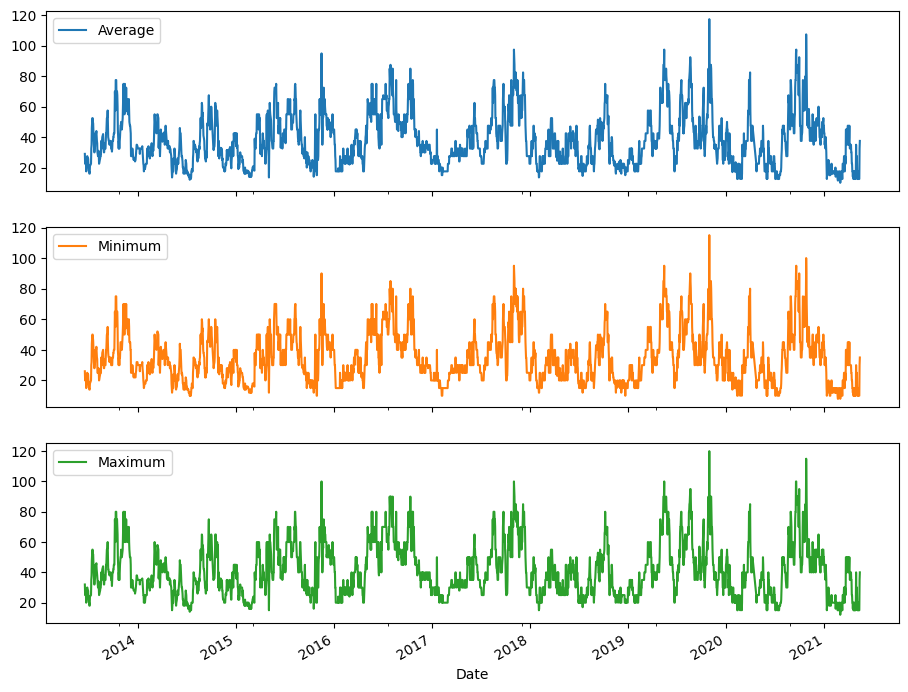

In [ ]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Average', 'Minimum', 'Maximum']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

In [ ]:
train_data['Result'] = (train_data['Maximum'] - train_data['Minimum']) / train_data['Minimum'] * 100.0
train_data['Reason'] = (train_data['Maximum'] - train_data['Minimum']) / train_data['Minimum'] * 100.0

In [ ]:
df = train_data[['Result', 'Reason', 'Average']]

In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['Data'] = df['Average'].shift(-forecast_out)

138


<ipython-input-44-0f7a934cae77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data'] = df['Average'].shift(-forecast_out)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [ ]:
scaler = StandardScaler()
X = np.array(df.drop(['Data'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-46-377b3e337247>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Data'], 1))


In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [ ]:
df.dropna(inplace=True)
y = np.array(df['Data'])

<ipython-input-48-e6ac5ef3e0d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [ ]:
lr_confidence

0.0038481410201358646

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [ ]:
rf_confidence

-0.04115688345780533

In [ ]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = lr.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-55-7879a049dd08>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-55-7879a049dd08>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-55-7879a049dd08>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

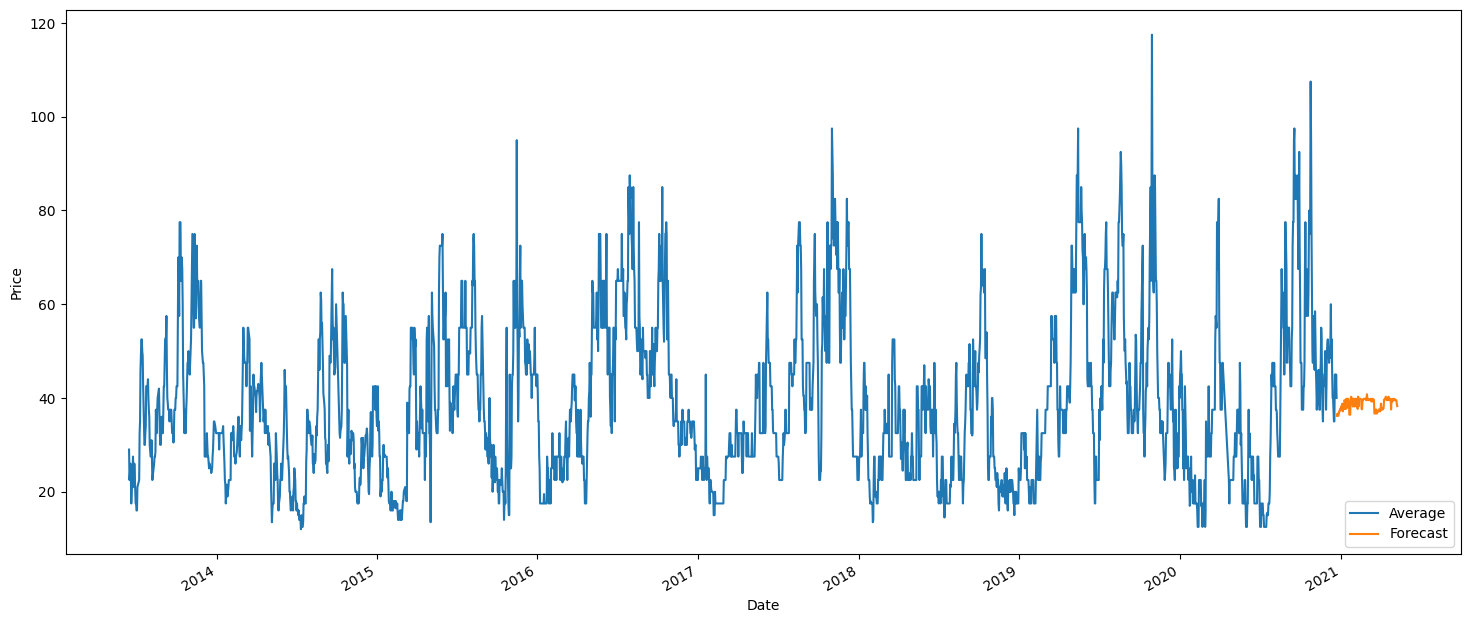

In [ ]:
plt.figure(figsize=(18, 8))
df['Average'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Clustering

<ipython-input-77-2ff176d9cd33>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


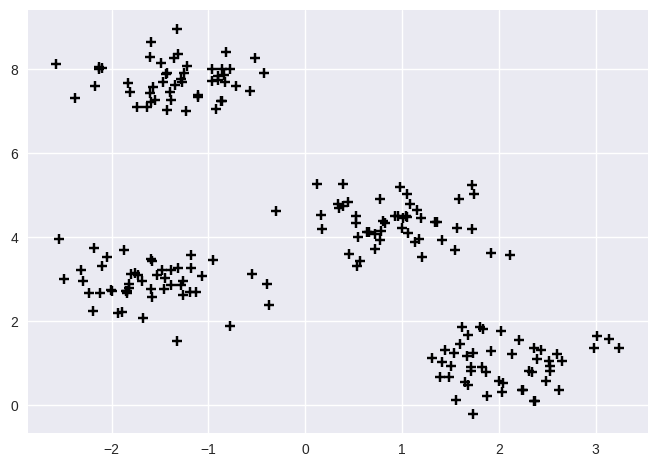

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('seaborn')
x, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5,shuffle=True, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c='k', marker='+', s=50)
plt.show()


In [ ]:
y

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

**1.1 K-means**
1- Randomly select centroids (center of cluster) for each cluster.
2- Calculate the distance of all data points to the centroids.
3- Assign data points to the closest cluster.
4- Find the new centroids of each cluster by taking the mean of all data points in the cluster.
5- Repeat steps 2,3 and 4 until all points converge and cluster centers stop moving

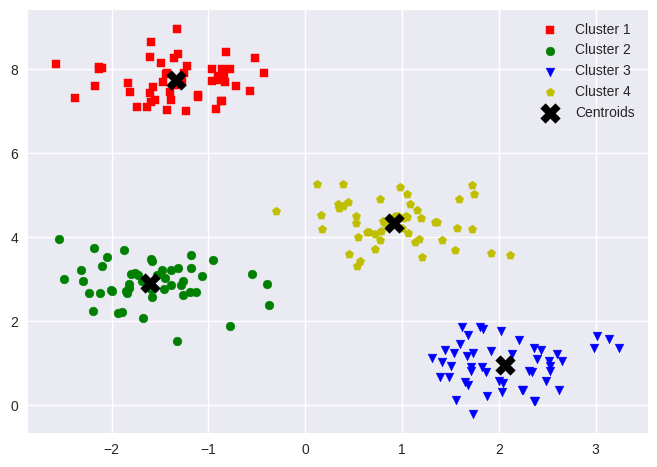

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
y_km = km.fit_predict(x)
plt.scatter(x[y_km==0, 0], x[y_km==0, 1], s=40, c='r', marker='s',label='Cluster 1')
plt.scatter(x[y_km==1, 0], x[y_km==1, 1], s=40, c='g', marker='o',label='Cluster 2')
plt.scatter(x[y_km==2, 0], x[y_km==2, 1], s=40, c='b', marker='v',label='Cluster 3')
plt.scatter(x[y_km==3, 0], x[y_km==3, 1], s=40, c='y', marker='p',label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200,marker='X', c='k', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()


**The Elbow Method**
Theorem: if k increases, the within-cluster SSE (“distortion”) will decrease.
Inertia is calculated by measuring the distance between each data point and its centroid.

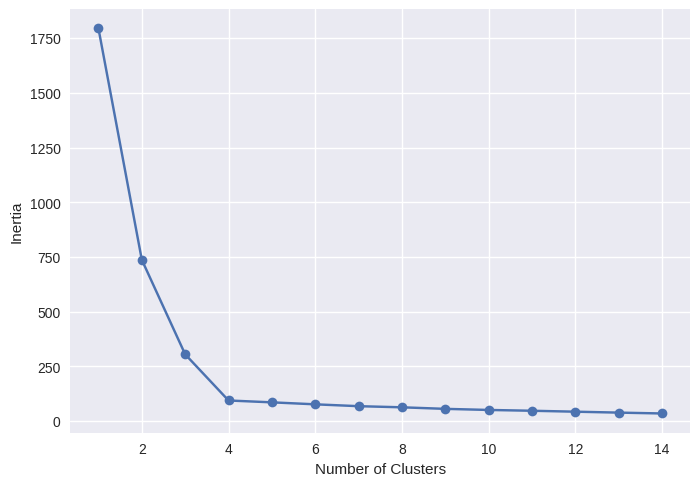

In [ ]:
inertias = []
for i in range(1, 15):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
  km.fit(x)
  inertias.append(km.inertia_)

plt.plot(range(1,15), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Another example for KMeans

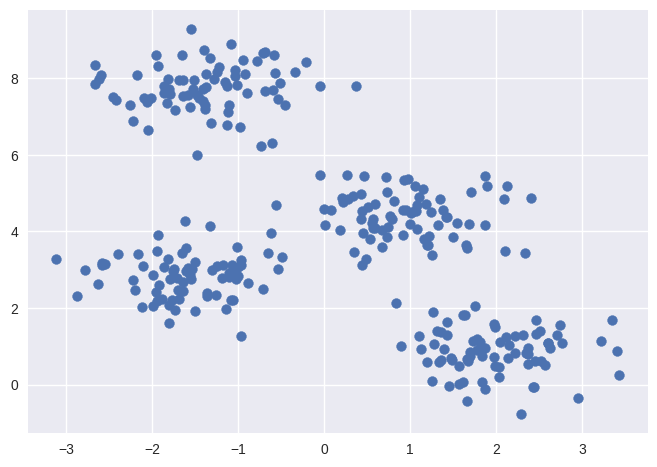

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60,
random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

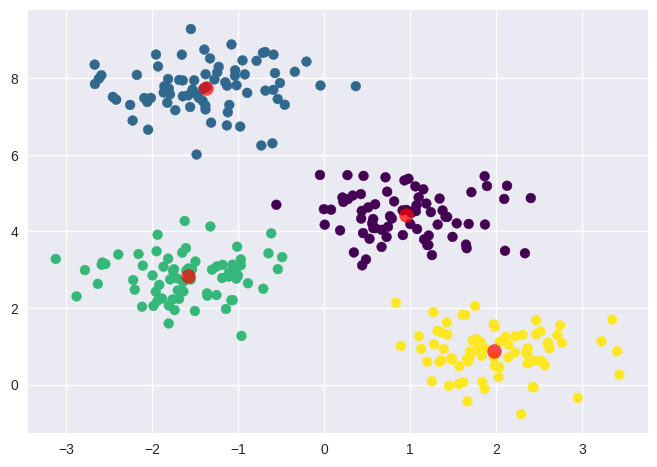

In [ ]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
pusat = kmeans.cluster_centers_
plt.scatter(pusat[:, 0], pusat[:, 1], c='red', s=100, alpha=0.7);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

In [ ]:
inersia = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inersia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

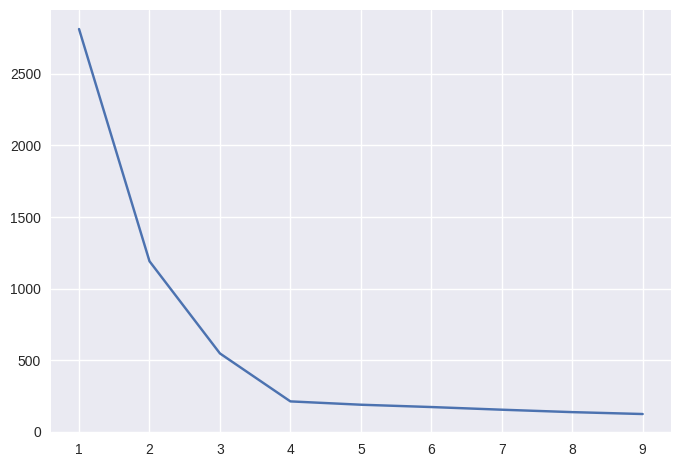

In [ ]:
plt.plot(range(1,10),inersia)
plt.show()

KMean6 with 6 cluster

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


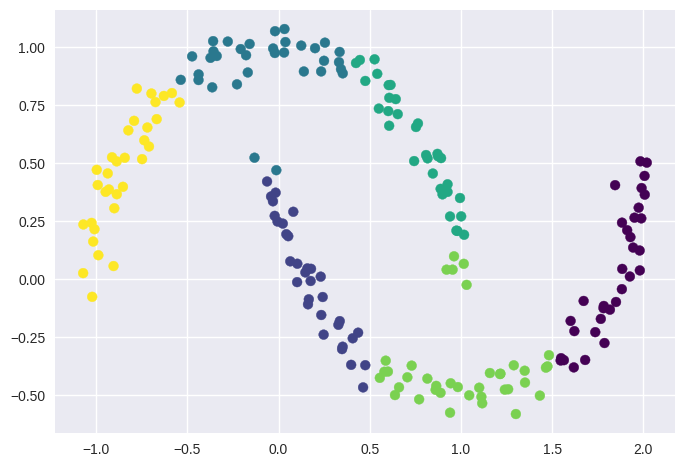

In [ ]:
label = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='viridis');

**Spectral Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


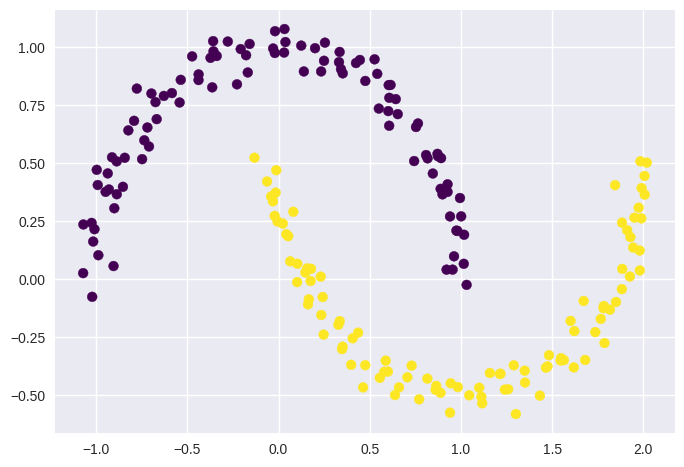

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**DBScan**

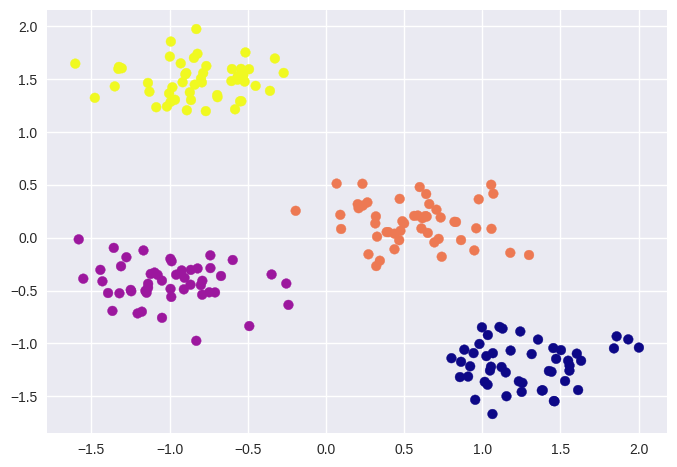

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=3)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()


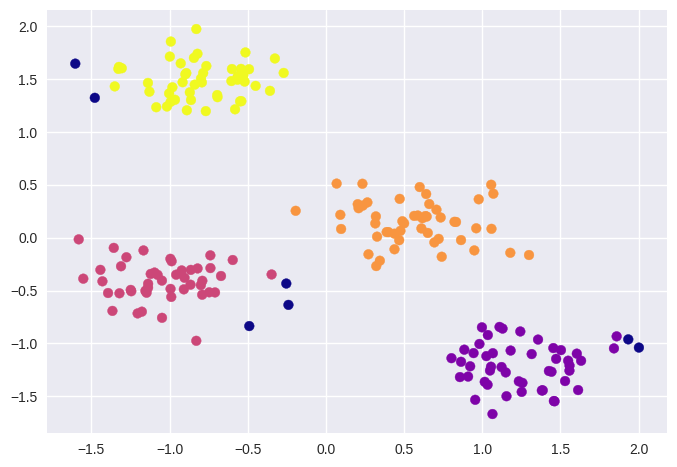

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=10)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()
